In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

Dimensional params

In [2]:
rho_T = 1e5
k_on = 1e5
k_off = 1e-4
beta_on = 2e13
beta_off = 1e-3
T_0 = 4.15e-16
t_0 = 1.44e4
q_on = 6.5e6
q_off = 4.7e-3
rho_N = 2.2e5

Dimensionless params

In [3]:
alpha_1 = k_on*t_0*rho_T*T_0
alpha_2 = k_off*t_0
n_1 = q_on*t_0*rho_N*T_0
n_2 = q_off*t_0
delta = rho_N/rho_T
v = beta_on*t_0*T_0
v_2 = beta_off*t_0

# function params
fk_max = 10
B_k = 0.005
kappa = 1

In [4]:
def kill(B):

    return fk_max*B/(B_k + B)

In [5]:
def dissoc(B):

    return v_2*np.exp(-kappa*B)

In [6]:
def model(t, z, mu, gamma):

    dA = -alpha_1*z[0]*(1 - z[1]- delta*z[3])*z[4] + alpha_2*gamma*delta*z[1]*z[4] + n_2*gamma*delta*z[2]*z[4] - n_1*z[0]*(1 - z[2] - z[3])*z[4]
    dR_T = -alpha_2*z[1] + (alpha_1/gamma)*z[0]*(1 - z[1] - delta*z[3]) + n_2*z[3] - n_1*z[1]*(1 - z[2] - z[3])*z[4]
    dR_N = (n_1/delta*gamma)*z[0]*(1 - z[2] - z[3]) - n_2*z[2] - alpha_1*z[2]*(1 - z[1] - delta*z[3])*z[4] + alpha_2*z[3]
    dB = (n_1/delta)*z[1]*(1 - z[2] - z[3])*z[4] - n_2*z[3] - alpha_2*z[3] + alpha_1*z[2]*(1 - z[1] - delta*z[3])*z[4]
    dS = -kill(z[3])*z[5]
    dC = v*((mu/1) - z[5])*(z[4] - z[5]) - dissoc(z[3])*z[5] - kill(z[3])*z[5]
    dz = [dA, dR_T, dR_N, dB, dS, dC]

    return dz


In [7]:
z_0 = [1, 0, 0, 0, 1, 0]
mu = 20
gamma = 1e-6
t= np.geomspace(0.00000001, 1, 1000)
t_span = [0.00000001, 1]

z = solve_ivp(model, t_span, z_0, args = (mu, gamma), method = 'Radau', t_eval = t )

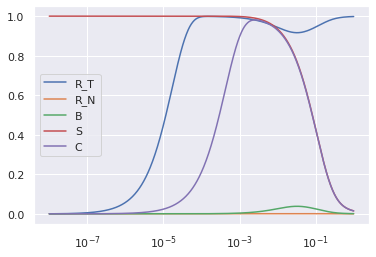

In [8]:
R_T = z.y[1]
R_N = z.y[2]
B = z.y[3]
S = z.y[4]
C = z.y[5]

sns.set_theme()

plt.semilogx(t, R_T, label = 'R_T')
plt.semilogx(t, R_N, label = 'R_N')
plt.semilogx(t, B, label = 'B')
plt.semilogx(t, S, label = 'S')
plt.semilogx(t, C, label = 'C')
plt.legend(loc='best')
plt.show()